# The Basics: Training One Layer MODEL



In [8]:
import tensorflow as tf
import numpy as np
import logging
import matplotlib.pyplot as plt

In [9]:
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

# Set up training data

Supervised Machine Learning is all about figuring out an algorithm given a set of inputs and outputs.Create a model that can give the temperature in Fahrenheit when given the degrees in Celsius

In [10]:
celsius=np.array([-40, -10,  0,  8, 15, 22,  38],dtype=float)
fahrenheit= np.array([-40,  14, 32, 46, 59, 72, 100],dtype=float)

for i,c in enumerate(celsius):
    print("{} degrees Celcius ={} degrees Fahreniet".format(c,fahrenheit[i]))

-40.0 degrees Celcius =-40.0 degrees Fahreniet
-10.0 degrees Celcius =14.0 degrees Fahreniet
0.0 degrees Celcius =32.0 degrees Fahreniet
8.0 degrees Celcius =46.0 degrees Fahreniet
15.0 degrees Celcius =59.0 degrees Fahreniet
22.0 degrees Celcius =72.0 degrees Fahreniet
38.0 degrees Celcius =100.0 degrees Fahreniet


# Create the model
We'll call the layer **l0** and create it by instantiating tf.keras.layers.Dense with the following configuration:
* input_shape=[1] — This specifies that the input to this layer is a single value.
* units=1 — This specifies the number of neurons in the layer.
* **The Sequential model** definition takes a list of layers as an argument, specifying the calculation order from the input to the output.

In [11]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=1, input_shape=[1])
])

# Compile the model, with loss and optimizer functions

* **Loss function —** A way of measuring how far off predictions are from the desired outcome. (The measured difference is called the "loss".)
* **Optimizer function —** A way of adjusting internal values in order to reduce the loss.

In [12]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

# Train the model

* During training, the model takes in **Celsius** values, performs a calculation using the current internal variables (called **"weights"**) and outputs values which are meant to be the **Fahrenheit** equivalent. 

*  The **epochs** argument specifies how many times this cycle should be run
*  The **verbose** argument controls how much output the method produces.

In [13]:
hist=model.fit(celsius,fahrenheit,epochs=1000,verbose=False)
print("Training finished")

Training finished


# Display training statistics


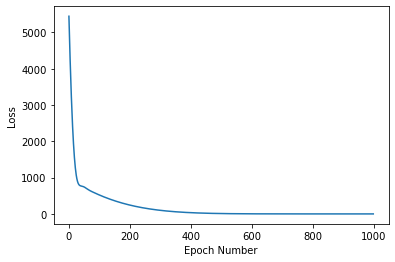

In [14]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(hist.history['loss'])

# Use the model to predict values
* Input=100 degree Celsius
* The correct answer is  100×1.8+32=212 

In [15]:
print(model.predict([100.0]))

[[211.74179]]


In [16]:
print("These are the layer variables: {}".format(model.get_weights()))

These are the layer variables: [array([[1.7982992]], dtype=float32), array([31.911867], dtype=float32)]


# what if we created more Dense layers with different units, which therefore also has more variables?

In [17]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(celsius, fahrenheit, epochs=500, verbose=False)
print("Finished training the model")
print(model.predict([100.0]))
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([100.0])))
print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))
print("These are the l2 variables: {}".format(l2.get_weights()))

Finished training the model
[[211.74747]]
Model predicts that 100 degrees Celsius is: [[211.74747]] degrees Fahrenheit
These are the l0 variables: [array([[ 1.2223386 ,  0.06927732, -0.00664209, -0.42382115]],
      dtype=float32), array([ 3.6862793, -2.9542785,  2.867136 ,  2.1982114], dtype=float32)]
These are the l1 variables: [array([[-1.4912193 ,  0.3269579 , -1.2433832 , -0.79188555],
       [ 1.2267264 , -0.9454718 ,  0.11551861, -0.14934176],
       [-0.8260997 ,  1.0444646 ,  0.00652634, -0.31740108],
       [-0.9796537 ,  0.04611228, -0.7336665 , -0.47410786]],
      dtype=float32), array([-3.8080077 ,  3.6644397 , -0.20001663,  0.43742537], dtype=float32)]
These are the l2 variables: [array([[-1.1049742 ],
       [ 0.8174389 ],
       [-0.03751269],
       [-0.05937129]], dtype=float32), array([3.3856158], dtype=float32)]
